---
__About Section:__

- __Author name:__ UBAIDULLAH

- __Email:__ [ai.bussiness.student0@gmail.com](mailto:ai.bussiness.student0@gmail.com)

- __GitHub:__ [github.com/ubaid-X/](https://github.com/ubaid-X/)

- __LinkedIn Profile:__ [linkedin.com/in/ubaid-ullah-634563373/](https://www.linkedin.com/in/ubaid-ullah-634563373/)

- __Kaggle:__ [kaggle.com/ubaidullah01](https://www.kaggle.com/ubaidullah01)

---

1. __Range:__ [click here](https://codanics.com/range-in-statistics/)
2. __IQR:__ [click here](https://codanics.com/interquartile-range-iqr/)
3. __Variance:__ [click here](https://codanics.com/variance-in-statistics/)
4. __Standard Deviation:__ [click here](https://codanics.com/standard-deviation/)

# __5. Standard Error (SE)__


## Simple Definition
**Standard Error (SE)** tells us how far the sample mean (average) is likely to be from the true population mean. Think of it as the "margin of error" for your sample average.

##  Explanation in Plain English

### What is it?
- When you take multiple samples from a population, each sample will have a slightly different mean
- Standard Error measures how much these sample means vary from each other
- **Small SE** = sample means are close to each other (more precise)
- **Large SE** = sample means are spread out (less precise)

### The Formula
```
Standard Error = Standard Deviation / √(Sample Size)
```
or
```
SE = σ / √n
```

## Why Use SE Instead of Standard Deviation?

| Standard Deviation | Standard Error |
|-------------------|----------------|
| Measures spread of **raw data** | Measures precision of **sample mean** |
| Answers: "How spread out are my data points?" | Answers: "How accurate is my sample average?" |
| Useful for describing **one dataset** | Useful for **making inferences** about population |

**Simple analogy:**
- **Standard Deviation**: How different students' test scores are from each other
- **Standard Error**: How much the class average might change if we took a different sample of students

## Tips & Tricks

1. **Sample Size Matters**: SE gets smaller as sample size increases
   - n=100 → SE = SD/10
   - n=10,000 → SE = SD/100

2. **Rule of Thumb**: 
   - 68% of sample means fall within ±1 SE of population mean
   - 95% of sample means fall within ±2 SE of population mean

3. **Quick Check**: If SE is very small, your sample mean is probably close to the true population mean

## Practical Example in Python

=== STANDARD ERROR DEMONSTRATION ===
True Population Mean: 169.98 cm
True Population Standard Deviation: 10.03 cm

=== OUR SAMPLE ===
Sample Mean: 170.73 cm
Sample Standard Deviation: 10.50 cm

=== STANDARD ERROR CALCULATION ===
Standard Error = Sample SD / √(Sample Size)
Standard Error = 10.67 / √30
Standard Error = 1.95 cm

=== INTERPRETATION ===
We estimate the true average height is 170.73 cm ± 1.95 cm
This means if we took many samples, 68% of sample means would be within
1.95 cm of the true population mean

=== 95% CONFIDENCE INTERVAL ===
Margin of Error = 3.99 cm
95% Confidence Interval: [166.75, 174.72] cm
Does this contain true population mean? True


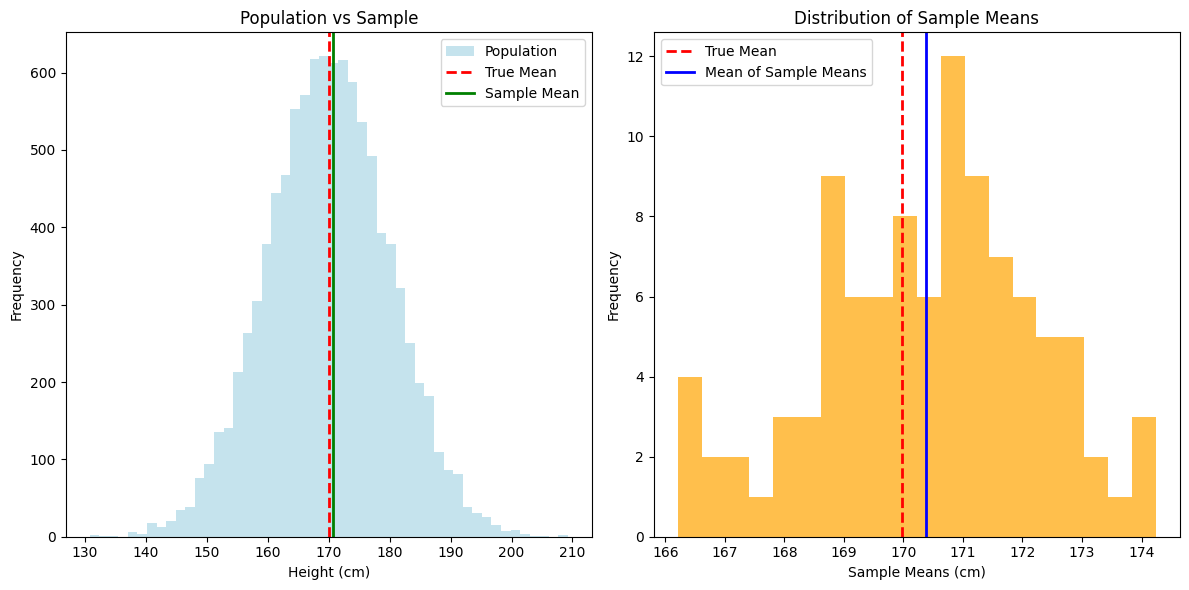


=== EFFECT OF SAMPLE SIZE ON SE ===
Sample Size   10: SE = 3.69 cm
Sample Size   30: SE = 1.86 cm
Sample Size  100: SE = 0.93 cm
Sample Size 1000: SE = 0.31 cm


In [1]:
# Standard Error Practical Example
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example: Let's study heights of college students
# We'll create a synthetic population of 10,000 students
np.random.seed(42)  # For reproducible results
population_heights = np.random.normal(170, 10, 10000)  # Mean=170cm, SD=10cm

print("=== STANDARD ERROR DEMONSTRATION ===")
print(f"True Population Mean: {np.mean(population_heights):.2f} cm")
print(f"True Population Standard Deviation: {np.std(population_heights):.2f} cm")

# Take a sample of 30 students from the population
sample_size = 30
sample = np.random.choice(population_heights, size=sample_size, replace=False)

print(f"\n=== OUR SAMPLE ===")
print(f"Sample Mean: {np.mean(sample):.2f} cm")
print(f"Sample Standard Deviation: {np.std(sample):.2f} cm")

# Calculate Standard Error
standard_error = np.std(sample, ddof=1) / np.sqrt(sample_size)
print(f"\n=== STANDARD ERROR CALCULATION ===")
print(f"Standard Error = Sample SD / √(Sample Size)")
print(f"Standard Error = {np.std(sample, ddof=1):.2f} / √{sample_size}")
print(f"Standard Error = {standard_error:.2f} cm")

# Interpretation
print(f"\n=== INTERPRETATION ===")
print(f"We estimate the true average height is {np.mean(sample):.2f} cm ± {standard_error:.2f} cm")
print(f"This means if we took many samples, 68% of sample means would be within")
print(f"{standard_error:.2f} cm of the true population mean")

# Confidence Interval (95%)
confidence_level = 0.95
t_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1)
margin_of_error = t_value * standard_error
ci_lower = np.mean(sample) - margin_of_error
ci_upper = np.mean(sample) + margin_of_error

print(f"\n=== 95% CONFIDENCE INTERVAL ===")
print(f"Margin of Error = {margin_of_error:.2f} cm")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}] cm")
print(f"Does this contain true population mean? {ci_lower <= np.mean(population_heights) <= ci_upper}")

# Visualize the concept
plt.figure(figsize=(12, 6))

# Plot 1: Show population and our sample
plt.subplot(1, 2, 1)
plt.hist(population_heights, bins=50, alpha=0.7, label='Population', color='lightblue')
plt.axvline(np.mean(population_heights), color='red', linestyle='--', linewidth=2, label='True Mean')
plt.axvline(np.mean(sample), color='green', linestyle='-', linewidth=2, label='Sample Mean')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Population vs Sample')
plt.legend()

# Plot 2: Show multiple samples and their means
plt.subplot(1, 2, 2)
sample_means = []
for i in range(100):
    sample_temp = np.random.choice(population_heights, size=sample_size, replace=False)
    sample_means.append(np.mean(sample_temp))

plt.hist(sample_means, bins=20, alpha=0.7, color='orange')
plt.axvline(np.mean(population_heights), color='red', linestyle='--', linewidth=2, label='True Mean')
plt.axvline(np.mean(sample_means), color='blue', linestyle='-', linewidth=2, label='Mean of Sample Means')
plt.xlabel('Sample Means (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.legend()

plt.tight_layout()
plt.show()

# Demonstrate how SE changes with sample size
print(f"\n=== EFFECT OF SAMPLE SIZE ON SE ===")
sample_sizes = [10, 30, 100, 1000]
for size in sample_sizes:
    temp_sample = np.random.choice(population_heights, size=size, replace=False)
    temp_se = np.std(temp_sample, ddof=1) / np.sqrt(size)
    print(f"Sample Size {size:4d}: SE = {temp_se:.2f} cm")

## Key Takeaways

1. **SE measures sampling error** - how much your sample mean might differ from the true mean
2. **Larger samples = smaller SE** - more data means more precise estimates
3. **SE is used for inference** - confidence intervals, hypothesis testing
4. **SD describes your data, SE estimates your precision**

## Memory Aid
> "Standard Deviation tells you about your DATA, Standard Error tells you about your ESTIMATE"

This means you'd report:
- **SD** when describing your sample: "Students' heights varied by ±10cm"
- **SE** when making claims about population: "The average height is 170cm ±2cm"

**Remember**: Both are important, but they answer different questions!